In [1]:
import geopandas as gpd
import pandas as pd
import math
from tqdm import trange, tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.patheffects as pe
import seaborn as sns
from scipy.cluster import hierarchy
import esda
import libpysal

In [2]:
access_county = gpd.read_file('/Users/jparkgeo/Git_Repo/ST_ICU_Access/data/access/ICU_access_measures/ICU_access_county.shp')
access_county

,index,NAME,06/01/2020,06/02/2020,06/03/2020,06/04/2020,06/05/2020,06/06/2020,06/07/2020,06/08/2020,...,12/23/2021,12/24/2021,12/25/2021,12/26/2021,12/27/2021,12/28/2021,12/29/2021,12/30/2021,12/31/2021,geometry
0,48327,Menard,0.481450,0.504673,0.494921,0.359804,0.380861,0.416848,0.445366,0.463968,...,0.057078,0.055447,0.057775,0.058969,0.056747,0.050579,0.046795,0.044798,0.042296,"POLYGON ((-99.77120 30.71079, -99.78240 30.710..."
1,48189,Hale,2.661175,2.398550,2.288703,0.672046,0.550668,0.580442,0.673039,0.691939,...,0.007549,0.006805,0.006247,0.005544,0.004431,0.004738,0.004571,0.004513,0.003913,"POLYGON ((-101.73504 33.82864, -101.73507 33.8..."
2,48011,Armstrong,0.008839,0.008874,0.009701,0.009687,0.008540,0.009005,0.009563,0.009912,...,0.001716,0.001967,0.002158,0.002462,0.002360,0.002270,0.002396,0.002478,0.002131,"POLYGON ((-101.08728 35.02708, -101.08729 35.0..."
3,48057,Calhoun,2.364419,1.663282,1.490708,0.618558,0.560262,0.519041,0.482546,0.417936,...,0.138889,0.120955,0.109047,0.109674,0.100102,0.084663,0.076442,0.073078,0.062078,"POLYGON ((-96.35229 28.50953, -96.35241 28.508..."
4,48077,Clay,1.756416,1.993939,1.554681,0.504286,0.399408,0.381449,0.362439,0.333911,...,0.001702,0.002336,0.003988,0.003731,0.004190,0.003748,0.004242,0.005163,0.004003,"POLYGON ((-97.97784 33.81417, -97.97784 33.813..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,48205,Hartley,0.006707,0.005750,0.004902,0.004558,0.004376,0.004434,0.004598,0.004674,...,0.001811,0.001831,0.001935,0.002155,0.002174,0.001744,0.001722,0.001556,0.001319,"POLYGON ((-102.31929 36.05545, -102.31679 36.0..."
250,48249,Jim Wells,0.088138,0.079848,0.083542,0.071925,0.067427,0.058720,0.055637,0.047810,...,0.015263,0.015418,0.013864,0.013206,0.011861,0.010291,0.009210,0.008283,0.006693,"POLYGON ((-97.93395 27.85971, -97.93395 27.859..."
251,48505,Zapata,0.016376,0.015432,0.014533,0.013183,0.011311,0.010970,0.010990,0.010499,...,0.000811,0.000611,0.000517,0.000439,0.000386,0.000347,0.000323,0.000289,0.000243,"POLYGON ((-99.15217 27.27142, -99.15088 27.271..."
252,48453,Travis,0.992614,0.944165,0.902917,0.317952,0.267939,0.253893,0.249922,0.242535,...,0.011647,0.010643,0.008338,0.007260,0.006277,0.005383,0.004461,0.003922,0.003542,"POLYGON ((-97.76561 30.43241, -97.76532 30.432..."


In [62]:
county_list = access_county.filter(['index', 'NAME', 'geometry'], axis=1)
county_list

,index,NAME,geometry
0,48327,Menard,"POLYGON ((-99.77120 30.71079, -99.78240 30.710..."
1,48189,Hale,"POLYGON ((-101.73504 33.82864, -101.73507 33.8..."
2,48011,Armstrong,"POLYGON ((-101.08728 35.02708, -101.08729 35.0..."
3,48057,Calhoun,"POLYGON ((-96.35229 28.50953, -96.35241 28.508..."
4,48077,Clay,"POLYGON ((-97.97784 33.81417, -97.97784 33.813..."
...,...,...,...
249,48205,Hartley,"POLYGON ((-102.31929 36.05545, -102.31679 36.0..."
250,48249,Jim Wells,"POLYGON ((-97.93395 27.85971, -97.93395 27.859..."
251,48505,Zapata,"POLYGON ((-99.15217 27.27142, -99.15088 27.271..."
252,48453,Travis,"POLYGON ((-97.76561 30.43241, -97.76532 30.432..."


In [18]:
import statistics

In [82]:
for idx, row in county_list.iterrows():
    county_list.at[idx, 'mean'] = access_county.loc[access_county['NAME'] == row['NAME'], focus_date].T.mean().values[0]
    county_list.at[idx, 'std'] = access_county.loc[access_county['NAME'] == row['NAME'], focus_date].T.std().values[0]
    county_list.at[idx, 'cv'] = county_list.at[idx, 'std'] / county_list.at[idx, 'mean']
    
county_list = county_list.fillna(0)
county_list = county_list.loc[(county_list['cv'] < 4) &( county_list['mean'] > 0)]
county_list

/var/folders/dv/bcrkszqj0634wz_17m9xw0qr0000gn/T/ipykernel_28925/3481223420.py:4: RuntimeWarning: invalid value encountered in double_scalars
  county_list.at[idx, 'cv'] = county_list.at[idx, 'std'] / county_list.at[idx, 'mean']
/var/folders/dv/bcrkszqj0634wz_17m9xw0qr0000gn/T/ipykernel_28925/3481223420.py:4: RuntimeWarning: invalid value encountered in double_scalars
  county_list.at[idx, 'cv'] = county_list.at[idx, 'std'] / county_list.at[idx, 'mean']
/var/folders/dv/bcrkszqj0634wz_17m9xw0qr0000gn/T/ipykernel_28925/3481223420.py:4: RuntimeWarning: invalid value encountered in double_scalars
  county_list.at[idx, 'cv'] = county_list.at[idx, 'std'] / county_list.at[idx, 'mean']
/var/folders/dv/bcrkszqj0634wz_17m9xw0qr0000gn/T/ipykernel_28925/3481223420.py:4: RuntimeWarning: invalid value encountered in double_scalars
  county_list.at[idx, 'cv'] = county_list.at[idx, 'std'] / county_list.at[idx, 'mean']
/var/folders/dv/bcrkszqj0634wz_17m9xw0qr0000gn/T/ipykernel_28925/3481223420.py:4: Ru

,index,NAME,geometry,mean,std,cv,kmeans
0,48327,Menard,"POLYGON ((-99.77120 30.71079, -99.78240 30.710...",0.045291,0.051983,1.147770,0
1,48189,Hale,"POLYGON ((-101.73504 33.82864, -101.73507 33.8...",0.029911,0.038855,1.298993,0
2,48011,Armstrong,"POLYGON ((-101.08728 35.02708, -101.08729 35.0...",0.005863,0.005530,0.943189,0
3,48057,Calhoun,"POLYGON ((-96.35229 28.50953, -96.35241 28.508...",0.055181,0.066482,1.204800,0
4,48077,Clay,"POLYGON ((-97.97784 33.81417, -97.97784 33.813...",0.020285,0.021367,1.053345,0
...,...,...,...,...,...,...,...
248,48441,Taylor,"POLYGON ((-99.63057 32.31390, -99.63057 32.313...",0.076106,0.110851,1.456529,0
249,48205,Hartley,"POLYGON ((-102.31929 36.05545, -102.31679 36.0...",0.011247,0.019995,1.777775,0
250,48249,Jim Wells,"POLYGON ((-97.93395 27.85971, -97.93395 27.859...",0.012581,0.013682,1.087498,0
252,48453,Travis,"POLYGON ((-97.76561 30.43241, -97.76532 30.432...",0.026005,0.024770,0.952520,0


In [26]:
def determine_number_of_cluster(array):
    km_cost = []  # Sum of squared distances of samples to their closest cluster center.
    distortions = []  # the average of the squared distances from the cluster centers of the respective clusters.Typically, the Euclidean distance metric is used.
    km_silhouette = []

    for i in range(2, 11):
        KM = KMeans(n_clusters=i, max_iter=999)
        KM.fit(array)

        # Calculate Silhouette Scores
        preds = KM.predict(array)
        silhouette = silhouette_score(array, preds)
        km_silhouette.append(silhouette)

    return km_silhouette

In [97]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(county_list[['mean', 'cv']])
y_kmeans = kmeans.predict(county_list[['mean', 'cv']])

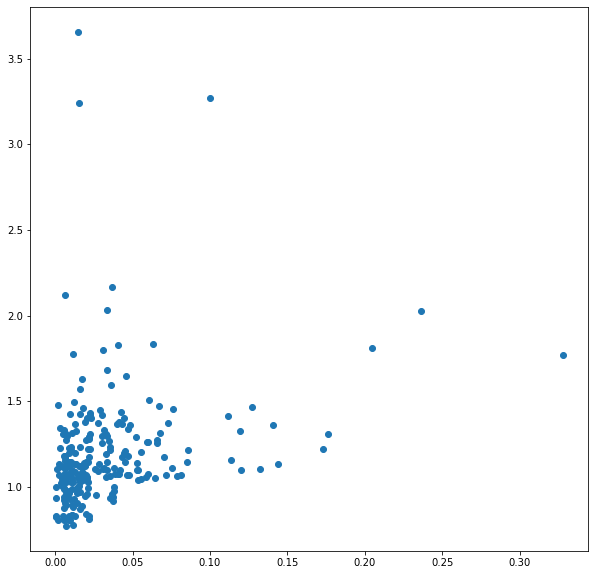

In [98]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(county_list['mean'], county_list['cv'])

In [95]:
y_kmeans

array([2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 1, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 1, 0, 2, 2,
       0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 2, 2, 2, 0,
       0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0], dtype=int32)

<AxesSubplot:>

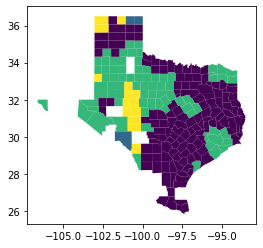

In [99]:
county_list['kmeans'] = y_kmeans
county_list.plot('kmeans')

In [92]:
determine_number_of_cluster(county_list[['mean', 'cv']])

[0.7637554137080932,
 0.5775187429066599,
 0.5455001203316783,
 0.5426066687293065,
 0.5038677382801587,
 0.49969300228535485,
 0.49066251510564723,
 0.46133959911448424,
 0.45238559695489905]

In [3]:
import datetime

from_date = '07/01/2020'
to_date = '12/31/2021'

start_date = datetime.datetime.strptime(from_date,  "%m/%d/%Y")
end_date = datetime.datetime.strptime(to_date,  "%m/%d/%Y")

focus_date = []
delta = datetime.timedelta(days=1)
while start_date <= end_date:
    focus_date.append(start_date.strftime("%m/%d/%Y"))
    start_date += delta
    
# Make a dictionary that has keys as target date and values as the date that should be averaged. 
focus_date_dict = {}
time_delta = [3, 2, 1, 0, -1, -2, -3]

for idx, date in enumerate(focus_date):
    temp_list = []
    for delta in time_delta:
        temp_list.append(
            str(
                (datetime.datetime.strptime(focus_date[idx], "%m/%d/%Y") - datetime.timedelta(days=delta)
                ).strftime("%m/%d/%Y"))
        )
        
    focus_date_dict[date] = temp_list
    
# Manually enter the dates that would have missing values
focus_date_dict['07/01/2020'] = ['07/01/2020', '07/02/2020', '07/03/2020', '07/04/2020']
focus_date_dict['07/02/2020'] = ['07/01/2020', '07/02/2020', '07/03/2020', '07/04/2020', '07/05/2020']
focus_date_dict['07/03/2020'] = ['07/01/2020', '07/02/2020', '07/03/2020', '07/04/2020', '07/05/2020', '07/06/2020']
focus_date_dict['12/29/2021'] = ['12/26/2021', '12/27/2021', '12/28/2021', '12/29/2021', '12/30/2021', '12/31/2021']
focus_date_dict['12/30/2021'] = ['12/27/2021', '12/28/2021', '12/29/2021', '12/30/2021', '12/31/2021']
focus_date_dict['12/31/2021'] = ['12/28/2021', '12/29/2021', '12/30/2021', '12/31/2021']
# focus_date_dict

In [41]:
access = gpd.read_file('/Users/jparkgeo/Git_Repo/ST_ICU_Access/data/access/ICU_access_measures/ICU_access_tract.shp')
access

,GEOID,06/01/2020,06/02/2020,06/03/2020,06/04/2020,06/05/2020,06/06/2020,06/07/2020,06/08/2020,06/09/2020,...,12/23/2021,12/24/2021,12/25/2021,12/26/2021,12/27/2021,12/28/2021,12/29/2021,12/30/2021,12/31/2021,geometry
0,48439121609,0.161680,0.165527,0.165790,0.102217,0.092232,0.089481,0.087822,0.084158,0.071822,...,0.009524,0.008484,0.007499,0.007019,0.006015,0.005198,0.004867,0.004332,0.003849,"POLYGON ((1258979.722 1169792.438, 1258982.386..."
1,48187210708,0.288999,0.270802,0.262718,0.189898,0.163777,0.160656,0.158163,0.146355,0.129688,...,0.011050,0.010220,0.008852,0.008359,0.007456,0.006754,0.006208,0.005578,0.005091,"POLYGON ((1168044.841 825633.988, 1168062.377 ..."
2,48201550301,0.028989,0.028079,0.028518,0.024990,0.023766,0.023730,0.024537,0.023845,0.021591,...,0.004680,0.004106,0.003591,0.003323,0.002947,0.002915,0.002672,0.002500,0.002367,"POLYGON ((1439359.176 877889.870, 1439375.495 ..."
3,48201550302,0.028175,0.027279,0.027705,0.024281,0.023097,0.023063,0.023846,0.023170,0.020980,...,0.004551,0.003994,0.003494,0.003233,0.002867,0.002835,0.002599,0.002431,0.002301,"POLYGON ((1436698.365 880665.773, 1437130.118 ..."
4,48157675800,0.059121,0.046625,0.042381,0.026221,0.023914,0.023062,0.022810,0.020996,0.017840,...,0.004240,0.003713,0.003213,0.003033,0.002723,0.002611,0.002341,0.002222,0.002037,"POLYGON ((1378127.932 833537.067, 1378446.964 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5260,48167720501,0.021362,0.020953,0.021397,0.018569,0.017554,0.017511,0.018163,0.017784,0.016100,...,0.003568,0.003126,0.002727,0.002516,0.002224,0.002180,0.001992,0.001863,0.001767,"POLYGON ((1467815.137 824783.412, 1467947.193 ..."
5261,48167721202,0.017263,0.016946,0.017347,0.015042,0.014231,0.014202,0.014734,0.014462,0.013088,...,0.002961,0.002600,0.002279,0.002100,0.001852,0.001805,0.001647,0.001538,0.001452,"POLYGON ((1476434.369 825589.518, 1476482.737 ..."
5262,48167722002,0.014618,0.014359,0.014798,0.012795,0.012137,0.012125,0.012587,0.012433,0.011242,...,0.002688,0.002373,0.002106,0.001934,0.001695,0.001627,0.001481,0.001376,0.001283,"POLYGON ((1490432.310 815434.091, 1490431.192 ..."
5263,48167720301,0.021319,0.020910,0.021338,0.018533,0.017518,0.017475,0.018125,0.017736,0.016060,...,0.003538,0.003098,0.002699,0.002492,0.002204,0.002164,0.001979,0.001851,0.001758,"POLYGON ((1462968.861 828458.156, 1463032.163 ..."


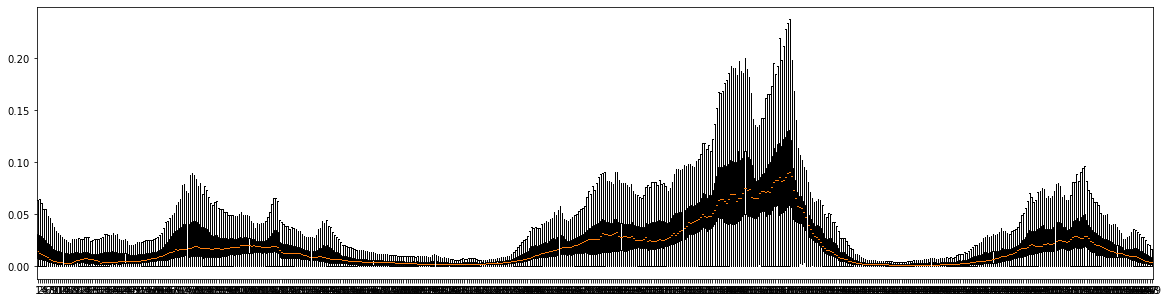

In [68]:
fig, ax = plt.subplots(figsize=(20,5))

svi_t1 = svi.loc[svi['RPL_THEME1'] > 0.9, 'FIPS'].to_list()
abc = access.loc[access['GEOID'].isin(svi_t1)]
ax.boxplot(abc[focus_date], showfliers=False)
plt.show()

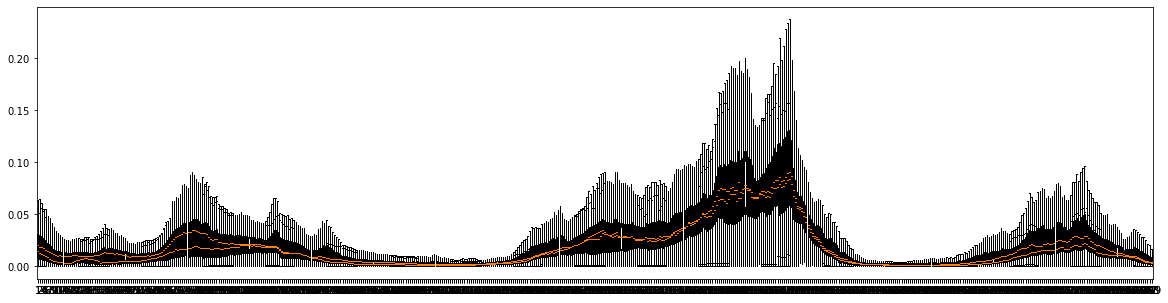

In [70]:
fig, ax = plt.subplots(figsize=(20,5))

svi_t1 = svi.loc[svi['RPL_THEME1'] < 0.1, 'FIPS'].to_list()
abc = access.loc[access['GEOID'].isin(svi_t1)]
ax.boxplot(abc[focus_date], showfliers=False)

svi_t1 = svi.loc[svi['RPL_THEME1'] > 0.9, 'FIPS'].to_list()
abc = access.loc[access['GEOID'].isin(svi_t1)]
ax.boxplot(abc[focus_date], showfliers=False)

plt.show()

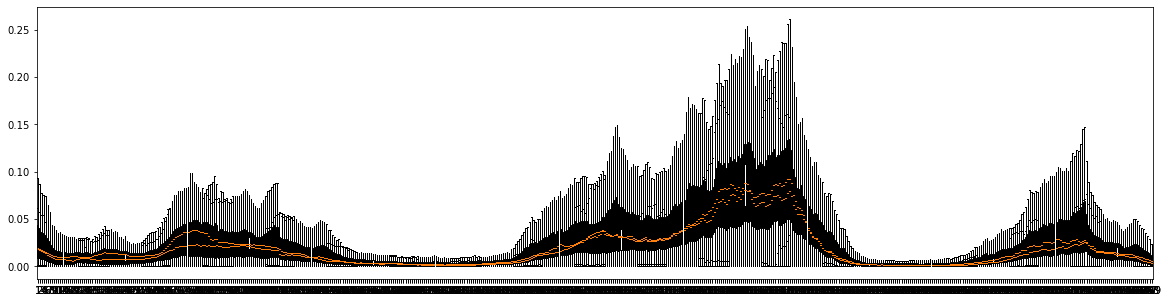

In [71]:
fig, ax = plt.subplots(figsize=(20,5))

svi_t1 = svi.loc[svi['RPL_THEME2'] < 0.1, 'FIPS'].to_list()
abc = access.loc[access['GEOID'].isin(svi_t1)]
ax.boxplot(abc[focus_date], showfliers=False)

svi_t1 = svi.loc[svi['RPL_THEME2'] > 0.9, 'FIPS'].to_list()
abc = access.loc[access['GEOID'].isin(svi_t1)]
ax.boxplot(abc[focus_date], showfliers=False)

plt.show()

In [76]:
abc[focus_date].median()

07/01/2020    0.009940
07/02/2020    0.009442
07/03/2020    0.008595
07/04/2020    0.008156
07/05/2020    0.007372
                ...   
12/27/2021    0.004009
12/28/2021    0.003949
12/29/2021    0.003607
12/30/2021    0.003382
12/31/2021    0.003203
Length: 549, dtype: float64

In [79]:
access_svi_good[focus_date].median()

07/01/2020    0.021935
07/02/2020    0.020929
07/03/2020    0.020007
07/04/2020    0.019049
07/05/2020    0.017516
                ...   
12/27/2021    0.006519
12/28/2021    0.005596
12/29/2021    0.005021
12/30/2021    0.004537
12/31/2021    0.003958
Length: 549, dtype: float64

In [85]:
access[date]

0       0.003849
1       0.005091
2       0.002367
3       0.002301
4       0.002037
          ...   
5260    0.001767
5261    0.001452
5262    0.001283
5263    0.001758
5264    0.001614
Name: 12/31/2021, Length: 5265, dtype: float64

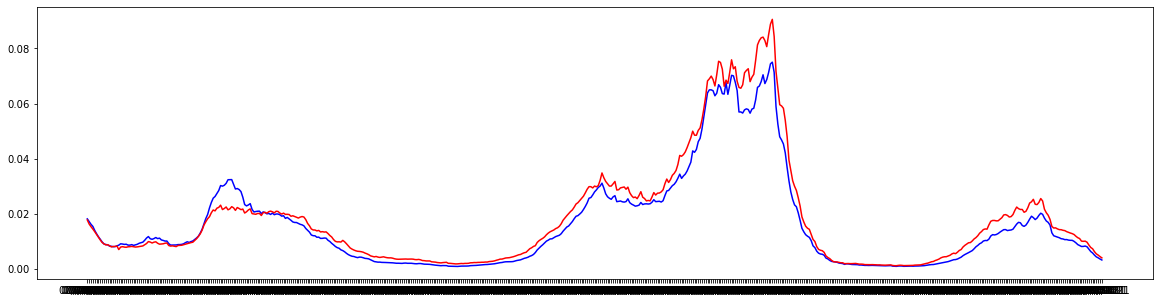

In [83]:
fig, ax = plt.subplots(figsize=(20,5))

svi_good = svi.loc[svi['RPL_THEME4'] < 0.1, 'FIPS'].to_list()
svi_bad = svi.loc[svi['RPL_THEME4'] > 0.9, 'FIPS'].to_list()

access_svi_good = access.loc[access['GEOID'].isin(svi_good)]
access_svi_bad = access.loc[access['GEOID'].isin(svi_bad)]

ax.plot(access_svi_good[focus_date].median(), color='blue')
ax.plot(access_svi_bad[focus_date].median(), color='red')

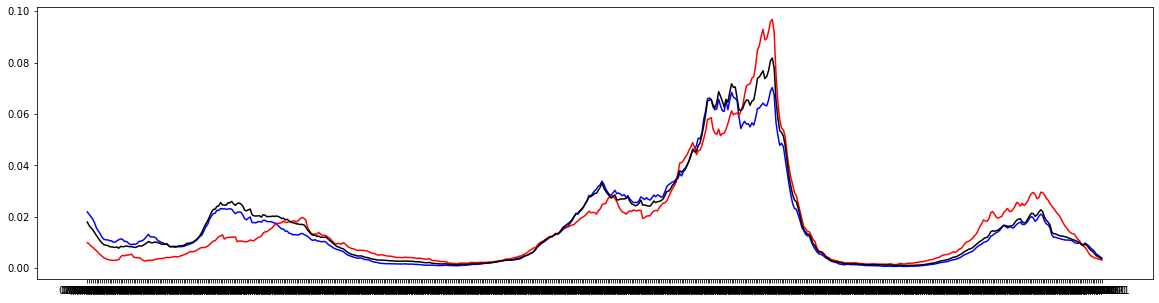

In [88]:
fig, ax = plt.subplots(figsize=(20,5))

svi_good = svi.loc[svi['RPL_THEME3'] < 0.1, 'FIPS'].to_list()
svi_bad = svi.loc[svi['RPL_THEME3'] > 0.9, 'FIPS'].to_list()

access_svi_good = access.loc[access['GEOID'].isin(svi_good)]
access_svi_bad = access.loc[access['GEOID'].isin(svi_bad)]

ax.plot(access_svi_good[focus_date].median(), color='blue')
ax.plot(access_svi_bad[focus_date].median(), color='red')
ax.plot(access[focus_date].median(), color='black')

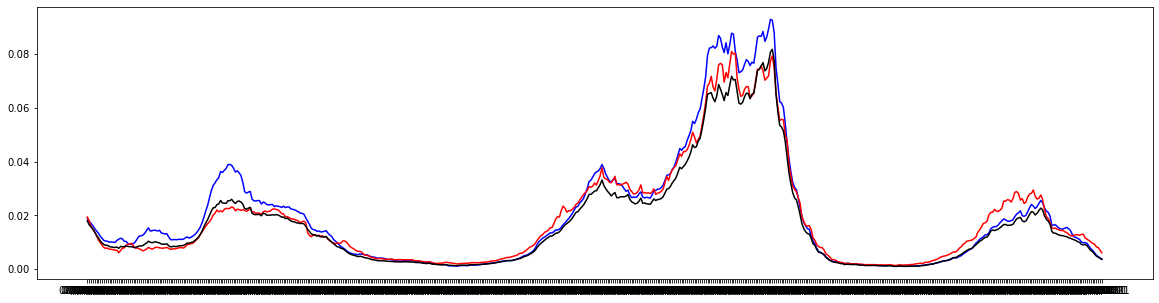

In [86]:
fig, ax = plt.subplots(figsize=(20,5))

svi_good = svi.loc[svi['RPL_THEME2'] < 0.1, 'FIPS'].to_list()
svi_bad = svi.loc[svi['RPL_THEME2'] > 0.9, 'FIPS'].to_list()

access_svi_good = access.loc[access['GEOID'].isin(svi_good)]
access_svi_bad = access.loc[access['GEOID'].isin(svi_bad)]

ax.plot(access_svi_good[focus_date].median(), color='blue')
ax.plot(access_svi_bad[focus_date].median(), color='red')
ax.plot(access[focus_date].median(), color='black')

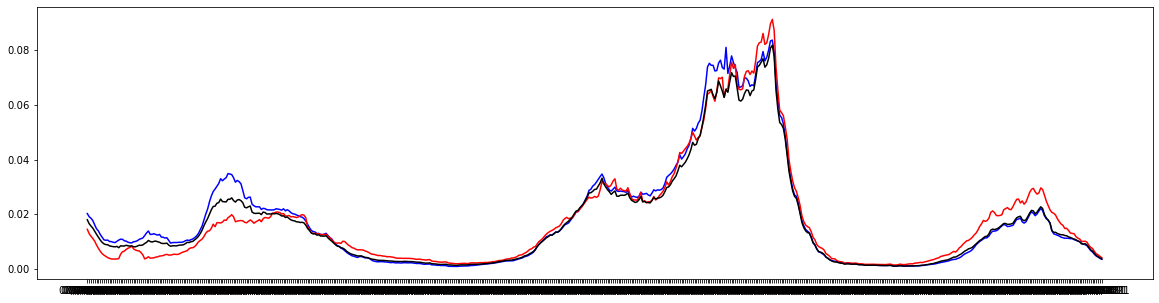

In [87]:
fig, ax = plt.subplots(figsize=(20,5))

svi_good = svi.loc[svi['RPL_THEME1'] < 0.1, 'FIPS'].to_list()
svi_bad = svi.loc[svi['RPL_THEME1'] > 0.9, 'FIPS'].to_list()

access_svi_good = access.loc[access['GEOID'].isin(svi_good)]
access_svi_bad = access.loc[access['GEOID'].isin(svi_bad)]

ax.plot(access_svi_good[focus_date].median(), color='blue')
ax.plot(access_svi_bad[focus_date].median(), color='red')
ax.plot(access[focus_date].median(), color='black')

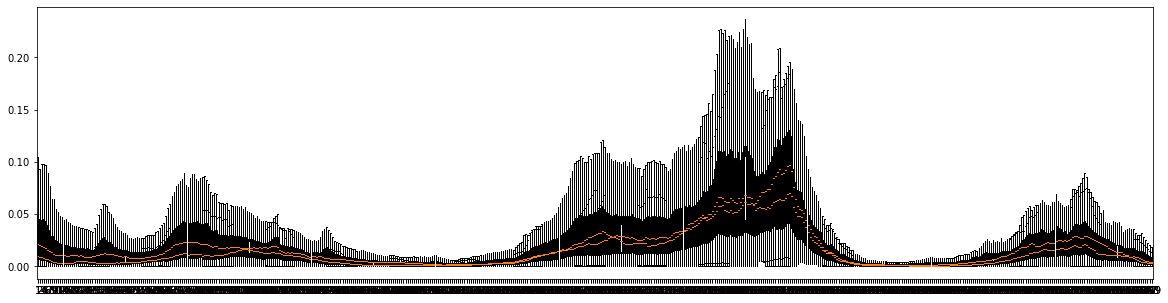

In [72]:
fig, ax = plt.subplots(figsize=(20,5))

svi_t1 = svi.loc[svi['RPL_THEME3'] < 0.1, 'FIPS'].to_list()
abc = access.loc[access['GEOID'].isin(svi_t1)]
ax.boxplot(abc[focus_date], showfliers=False)

svi_t1 = svi.loc[svi['RPL_THEME3'] > 0.9, 'FIPS'].to_list()
abc = access.loc[access['GEOID'].isin(svi_t1)]
ax.boxplot(abc[focus_date], showfliers=False)

plt.show()

In [55]:
abc['07/01/2020'].boxplot()

AttributeError: 'Series' object has no attribute 'boxplot'

In [48]:
svi_t1.to_list()

['48005000500',
 '48005000700',
 '48005001001',
 '48027020702',
 '48027020800',
 '48027020900',
 '48027022600',
 '48027023500',
 '48029110500',
 '48029110600',
 '48029110700',
 '48029120502',
 '48029130401',
 '48029130402',
 '48029130500',
 '48029130600',
 '48029131000',
 '48029140800',
 '48029141000',
 '48029150502',
 '48029150600',
 '48029150800',
 '48029151100',
 '48029151400',
 '48029160100',
 '48029160501',
 '48029160502',
 '48029160600',
 '48029160702',
 '48029160901',
 '48029160902',
 '48029161000',
 '48029161302',
 '48029161303',
 '48029161304',
 '48029161504',
 '48029170101',
 '48029170200',
 '48029170300',
 '48029170401',
 '48029170402',
 '48029170800',
 '48029170900',
 '48029171000',
 '48029171100',
 '48029171301',
 '48029171502',
 '48029171602',
 '48029171802',
 '48029180504',
 '48029191003',
 '48037010500',
 '48039664300',
 '48041000500',
 '48041001702',
 '48047950200',
 '48049950700',
 '48061010500',
 '48061010800',
 '48061010900',
 '48061011000',
 '48061011100',
 '480610

In [40]:
svi = gpd.read_file('/Users/jparkgeo/Downloads/Texas/SVI2018_TEXAS_tract.shp')
svi

,ST,STATE,ST_ABBR,STCNTY,COUNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,...,F_THEME4,F_TOTAL,E_UNINSUR,M_UNINSUR,EP_UNINSUR,MP_UNINSUR,E_DAYPOP,Shape_STAr,Shape_STLe,geometry
0,48,TEXAS,TX,48001,Anderson,48001950100,"Census Tract 9501, Anderson County, Texas",186.605851,5164,525,...,1,1,606,199,11.8,3.7,3098,0.046864,1.085375,"POLYGON ((-95.69704 31.97583, -95.69483 31.979..."
1,48,TEXAS,TX,48001,Anderson,48001950401,"Census Tract 9504.01, Anderson County, Texas",6.389922,4872,263,...,1,2,64,50,21.5,13.6,4344,0.001601,0.231353,"POLYGON ((-95.84761 31.75934, -95.84660 31.758..."
2,48,TEXAS,TX,48001,Anderson,48001950402,"Census Tract 9504.02, Anderson County, Texas",27.981599,7548,356,...,1,3,12,18,5.5,8.5,5795,0.007146,0.575009,"POLYGON ((-95.98345 31.78998, -95.98172 31.792..."
3,48,TEXAS,TX,48001,Anderson,48001950500,"Census Tract 9505, Anderson County, Texas",8.931328,4569,520,...,0,0,892,346,19.9,7.0,3532,0.002211,0.263602,"POLYGON ((-95.68778 31.81046, -95.68161 31.810..."
4,48,TEXAS,TX,48001,Anderson,48001950600,"Census Tract 9506, Anderson County, Texas",7.974506,5570,754,...,0,0,832,396,15.1,6.8,5496,0.002001,0.271897,"POLYGON ((-95.70784 31.72538, -95.70396 31.728..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5249,48,TEXAS,TX,48505,Zapata,48505950400,"Census Tract 9504, Zapata County, Texas",985.536201,6055,806,...,2,9,1929,456,31.9,5.6,4285,0.245277,2.479425,"POLYGON ((-99.45380 27.26506, -99.42542 27.283..."
5250,48,TEXAS,TX,48507,Zavala,48507950100,"Census Tract 9501, Zavala County, Texas",430.198755,1274,435,...,2,8,325,159,25.5,10.0,787,0.103383,1.765263,"POLYGON ((-99.83039 28.78578, -99.82467 28.789..."
5251,48,TEXAS,TX,48507,Zavala,48507950200,"Census Tract 9502, Zavala County, Texas",228.099423,1647,436,...,2,7,429,173,26.0,7.1,1267,0.054866,1.409923,"POLYGON ((-100.11141 29.08632, -100.00107 29.0..."
5252,48,TEXAS,TX,48507,Zavala,48507950301,"Census Tract 9503.01, Zavala County, Texas",631.589940,1981,356,...,2,5,499,205,27.0,7.8,3798,0.151674,2.235460,"POLYGON ((-100.11314 28.77625, -100.11329 28.7..."


In [42]:
svi = gpd.read_file('/Users/jparkgeo/Downloads/Texas/SVI2018_TEXAS_tract.shp')
svi = svi[['COUNTY', 'FIPS', 'RPL_THEME1', 'RPL_THEME2', 'RPL_THEME3', 'RPL_THEME4', 'RPL_THEMES', 'geometry']]
svi = svi.loc[(svi['RPL_THEME1'] != -999) & (svi['RPL_THEME4'] != -999)]
svi

,COUNTY,FIPS,RPL_THEME1,RPL_THEME2,RPL_THEME3,RPL_THEME4,RPL_THEMES,geometry
0,Anderson,48001950100,0.3853,0.7610,0.1308,0.7545,0.4965,"POLYGON ((-95.69704 31.97583, -95.69483 31.979..."
1,Anderson,48001950401,0.4162,0.0230,0.3439,0.5421,0.2477,"POLYGON ((-95.84761 31.75934, -95.84660 31.758..."
2,Anderson,48001950402,0.6895,0.0626,0.3219,0.3123,0.3422,"POLYGON ((-95.98345 31.78998, -95.98172 31.792..."
3,Anderson,48001950500,0.7202,0.7878,0.6467,0.9167,0.8433,"POLYGON ((-95.68778 31.81046, -95.68161 31.810..."
4,Anderson,48001950600,0.5552,0.4861,0.2766,0.7387,0.5470,"POLYGON ((-95.70784 31.72538, -95.70396 31.728..."
...,...,...,...,...,...,...,...,...
5249,Zapata,48505950400,0.9770,0.9874,0.9441,0.6923,0.9789,"POLYGON ((-99.45380 27.26506, -99.42542 27.283..."
5250,Zavala,48507950100,0.9987,0.9828,0.8812,0.6981,0.9818,"POLYGON ((-99.83039 28.78578, -99.82467 28.789..."
5251,Zavala,48507950200,0.9800,0.9933,0.7209,0.6628,0.9570,"POLYGON ((-100.11141 29.08632, -100.00107 29.0..."
5252,Zavala,48507950301,0.8459,0.9379,0.6272,0.9699,0.9495,"POLYGON ((-100.11314 28.77625, -100.11329 28.7..."


<AxesSubplot:>

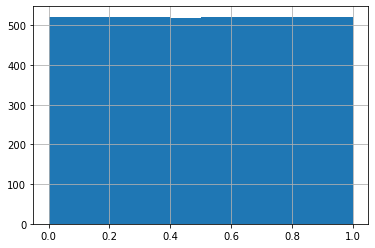

In [15]:
svi['RPL_THEME1'].hist()

In [6]:
def determine_number_of_cluster(array):
    km_cost = []  # Sum of squared distances of samples to their closest cluster center.
    distortions = []  # the average of the squared distances from the cluster centers of the respective clusters.Typically, the Euclidean distance metric is used.
    km_silhouette = []

    for i in range(2, 11):
        KM = KMeans(n_clusters=i, max_iter=999)
        KM.fit(array)

        # Calculate Silhouette Scores
        preds = KM.predict(array)
        silhouette = silhouette_score(array, preds)
        km_silhouette.append(silhouette)

    return km_silhouette

In [34]:
determine_number_of_cluster(svi[['RPL_THEME1', 'RPL_THEME2', 'RPL_THEME3', 'RPL_THEME4']])

[0.3079200517299838,
 0.2765291446010104,
 0.26581277506788836,
 0.2603578286296274,
 0.2569649404445624,
 0.24482071851295847,
 0.2533095671518782,
 0.2608163997695953,
 0.26534392853581046]

In [25]:
svi_array = svi[['RPL_THEME1', 'RPL_THEME2', 'RPL_THEME3', 'RPL_THEME4']]

kmeans = KMeans(n_clusters=4)
kmeans.fit(svi_array)
svi['k_means'] = kmeans.predict(svi_array)

# y_kmeans = np.where(y_kmeans==y_kmeans[3], 'A', y_kmeans)
# y_kmeans = np.where(y_kmeans==y_kmeans[14], 'C', y_kmeans)
# y_kmeans = np.where(y_kmeans==y_kmeans[19], 'D', y_kmeans)
# y_kmeans = np.where(y_kmeans==y_kmeans[22], 'B', y_kmeans)

In [31]:
for i in range(4):
    temp = svi.loc[svi['k_means'] == i]
    print(i, round(temp['RPL_THEME1'].mean(), 2), round(temp['RPL_THEME2'].mean(), 2), round(temp['RPL_THEME3'].mean(), 2), round(temp['RPL_THEME4'].mean(), 2))

0 0.56 0.29 0.65 0.58
1 0.46 0.7 0.28 0.54
2 0.82 0.77 0.8 0.71
3 0.17 0.25 0.27 0.21


<AxesSubplot:>

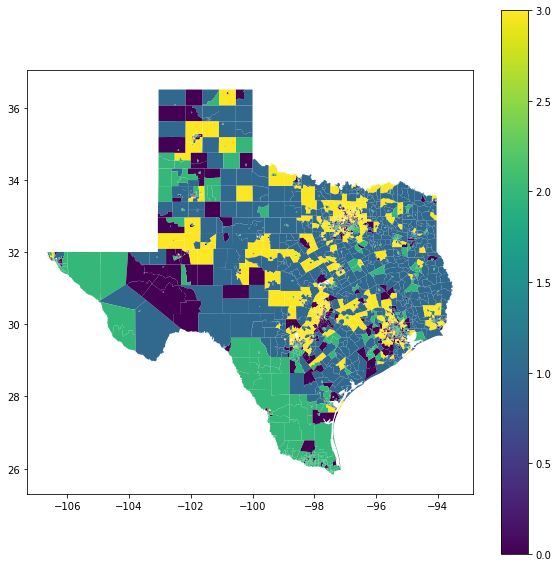

In [28]:
svi.plot('k_means', figsize=(10, 10), legend=True)